In [ ]:
import geopandas as gpd

resolution_choices = ["01M", "03M", "10M", "30M", "60M"]
res = "10M"  # Použijeme "10M" pro Českou republiku.
country = "CZ"  # Změňte na "CZ" pro Českou republiku.

world_country_borders = gpd.read_file(
        f"https://gisco-services.ec.europa.eu/distribution/v2/countries/geojson/CNTR_RG_{res}_2020_4326.geojson")
country_border = world_country_borders[world_country_borders["CNTR_ID"] == country]


<Axes: >

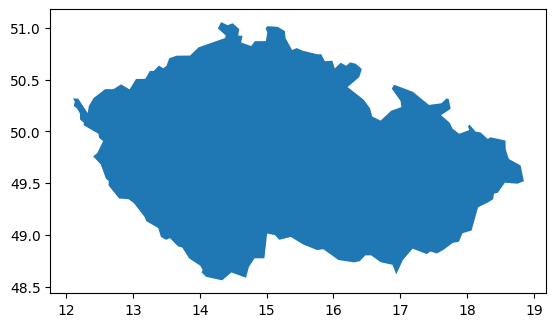

In [ ]:
country_border.plot()

In [ ]:
"""
# Clip US border to just CONUS
if country == "US":
    country_border = country_border.clip_by_rect(-140,20,-50,50)
    # clip_by_rect returns a geoseries, so turning back to a GDF
    country_border = gpd.GeoDataFrame(geometry=gpd.GeoSeries(country_border))
    country_border.plot()
"""

'\n# Clip US border to just CONUS\nif country == "US":\n    country_border = country_border.clip_by_rect(-140,20,-50,50)\n    # clip_by_rect returns a geoseries, so turning back to a GDF\n    country_border = gpd.GeoDataFrame(geometry=gpd.GeoSeries(country_border))\n    country_border.plot()\n'

In [ ]:
import zipfile
import requests


url = "https://data.hydrosheds.org/file/hydrobasins/standard/hybas_eu_lev01-12_v1c.zip"
file_name = "hybas_eu_lev01-12_v1c.zip"


r = requests.get(url)
with open(file_name, 'wb') as outfile:
    outfile.write(r.content)

with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

<Axes: >

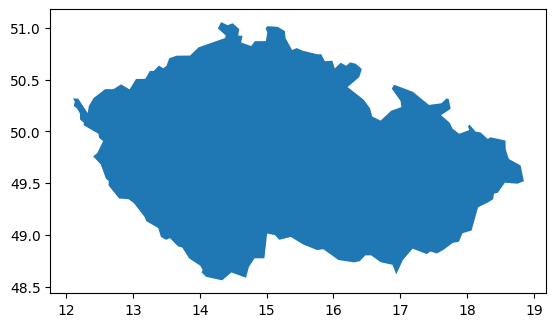

In [ ]:
europe_basin = gpd.read_file("/content/hybas_eu_lev01_v1c.shp")
# print("Intersect Basin with only the wanted Country Boundary.")
country_basin = gpd.overlay(
    country_border, europe_basin, how='intersection')
country_basin.plot()

In [ ]:
# Get Rivers
url = "https://data.hydrosheds.org/file/HydroRIVERS/HydroRIVERS_v10_na_shp.zip"
file_name = "europe-rivers.zip"

r = requests.get(url)
with open(file_name, 'wb') as outfile:
    outfile.write(r.content)

with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import os
europe_rivers = gpd.read_file(os.path.join("/content/HydroRIVERS_v10_eu.gdb"))

In [ ]:
country_river_basin = gpd.overlay(
    europe_rivers, country_basin, how='intersection')
country_river_basin

,HYRIV_ID,NEXT_DOWN_1,MAIN_RIV,LENGTH_KM,DIST_DN_KM,DIST_UP_KM,CATCH_SKM,UPLAND_SKM,ENDORHEIC,DIS_AV_CMS,...,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,20348103,20347160,20282220,3.88,700.500000,10.7,10.670000,49.200001,0,0.334,...,0.0,0.0,17858904.0,17858904.0,2,0,1,0,1,"LINESTRING (14.46042 51.01042, 14.45625 51.014..."
1,20348241,20348103,20282220,1.28,704.500000,5.7,12.430000,12.400000,0,0.085,...,0.0,0.0,17858904.0,17858904.0,2,0,1,0,1,"LINESTRING (14.44583 51.00625, 14.45625 51.006..."
2,20348242,20348103,20282220,1.11,704.299988,6.9,26.080000,26.100000,0,0.176,...,0.0,0.0,17858904.0,17858904.0,2,0,1,0,1,"LINESTRING (14.47083 51.00417, 14.46458 51.010..."
3,20348245,20347873,20282318,5.85,380.799988,13.7,25.120001,25.100000,0,0.209,...,0.0,0.0,17858904.0,17858904.0,2,0,1,0,1,"LINESTRING (15.08750 51.00417, 15.07891 51.01275)"
4,20348547,20348970,20282220,1.16,660.700012,5.8,14.040000,14.000000,0,0.096,...,0.0,0.0,17858904.0,17858904.0,2,0,1,0,1,"LINESTRING (14.34792 51.00417, 14.34792 50.99375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,20409074,20409073,20282220,2.55,1041.099976,6.8,17.459999,17.500000,0,0.174,...,0.0,0.0,17858904.0,17858904.0,2,0,1,0,1,"LINESTRING (14.39587 48.59375, 14.39375 48.593..."
4007,20409323,20409324,20282220,2.85,1041.900024,7.1,19.170000,19.200001,0,0.203,...,0.0,0.0,17858904.0,17858904.0,2,0,1,0,1,"LINESTRING (14.32500 48.58542, 14.33958 48.585..."
4008,20409324,20408722,20282220,2.69,1039.300049,9.7,5.400000,41.099998,0,0.441,...,0.0,0.0,17858904.0,17858904.0,2,0,1,0,1,"LINESTRING (14.36042 48.58125, 14.37708 48.597..."
4009,20409704,20409324,20282220,1.85,1042.000000,6.7,16.480000,16.500000,0,0.183,...,0.0,0.0,17858904.0,17858904.0,2,0,1,0,1,"LINESTRING (14.35357 48.57023, 14.36042 48.577..."


In [ ]:
country_river_basin['ORD_FLOW'].unique()

array([7, 8, 6, 4, 5])

In [ ]:
# 5. RIVER WIDTH
# --------------

def assign_river_width(row):
    if row['ORD_FLOW'] == 1:
        return 0.8
    elif row['ORD_FLOW'] == 2:
        return 0.7
    elif row['ORD_FLOW'] == 3:
        return 0.6
    elif row['ORD_FLOW'] == 4:
        return 0.45
    elif row['ORD_FLOW'] == 5:
        return 0.35
    elif row['ORD_FLOW'] == 6:
        return 0.25
    elif row['ORD_FLOW'] == 7:
        return 0.2
    elif row['ORD_FLOW'] == 8:
        return 0.15
    elif row['ORD_FLOW'] == 9:
        return 0.1
    else:
        return 0


country_river_basin['width'] = country_river_basin.apply(
    assign_river_width, axis=1)

In [ ]:
country_river_basin['HYBAS_ID'].unique()
len(country_river_basin['HYBAS_ID'])

4011

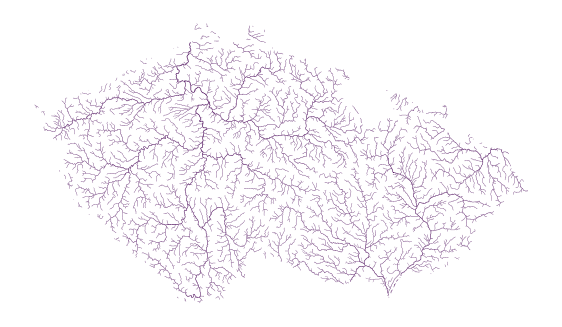

In [ ]:
# 6. PLOT
# --------

from matplotlib import cm, colormaps, pyplot as plt
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(7, 7.75))
country_river_basin.plot(ax=ax, column='HYBAS_ID', cmap=colormaps['viridis'],
                         linewidth=country_river_basin['width'],
                        #  edgecolor='black',
                        #  alpha=country_river_basin['width'],
                         categorical=True,
                        #  legend=True
                        )
ax.set_axis_off()
# plt.title('')


In [ ]:
country_river_basin['HYBAS_ID'].unique()

array([2010000010])

In [ ]:
country_river_basin.head()

,HYRIV_ID,NEXT_DOWN_1,MAIN_RIV,LENGTH_KM,DIST_DN_KM,DIST_UP_KM,CATCH_SKM,UPLAND_SKM,ENDORHEIC,DIS_AV_CMS,...,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry,width
0,20348103,20347160,20282220,3.88,700.500000,10.7,10.670000,49.200001,0,0.334,...,0.0,17858904.0,17858904.0,2,0,1,0,1,"LINESTRING (14.46042 51.01042, 14.45625 51.014...",0.20
1,20348241,20348103,20282220,1.28,704.500000,5.7,12.430000,12.400000,0,0.085,...,0.0,17858904.0,17858904.0,2,0,1,0,1,"LINESTRING (14.44583 51.00625, 14.45625 51.006...",0.15
2,20348242,20348103,20282220,1.11,704.299988,6.9,26.080000,26.100000,0,0.176,...,0.0,17858904.0,17858904.0,2,0,1,0,1,"LINESTRING (14.47083 51.00417, 14.46458 51.010...",0.20
3,20348245,20347873,20282318,5.85,380.799988,13.7,25.120001,25.100000,0,0.209,...,0.0,17858904.0,17858904.0,2,0,1,0,1,"LINESTRING (15.08750 51.00417, 15.07891 51.01275)",0.20
4,20348547,20348970,20282220,1.16,660.700012,5.8,14.040000,14.000000,0,0.096,...,0.0,17858904.0,17858904.0,2,0,1,0,1,"LINESTRING (14.34792 51.00417, 14.34792 50.99375)",0.15


In [ ]:
fig.savefig('cz-river-basins.png', dpi=600,
            bbox_inches='tight', pad_inches=0, transparent=True)

In [ ]:
country_river_basin.to_file("cz-river-basins.geojson", driver="GeoJSON")

GPT cz rivers 7.10.23